

```
The Notebook can be loaded from this link:
https://colab.research.google.com/drive/1hYfTuLktgXm-uD9N3fKXlxCAXQ7V4bYN
```



In [1]:
import os
from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/chengmar09/comp0053.git  

GitHub user··········
GitHub password··········
fatal: destination path 'comp0053' already exists and is not an empty directory.


In [2]:
!echo 'Check Current Dir'
%cd /content/comp0053/
%tensorflow_version 1.x
!pwd && ls
!pip install -r Requirement.txt
!pip install h5py

Check Current Dir
/content/comp0053
TensorFlow 1.x selected.
/content/comp0053
COMP0053_EmoPain_Demo.ipynb  helper.py	  Requirement.txt
data			     __pycache__  train.py
Feature_Selection.ipynb      README.md


In [3]:
from helper import *
import scipy

movementDataLoader = DataReader('Movementdata') #<- Automatically download data
(train_x, train_y), (valid_x, valid_y) = movementDataLoader.more_more_processing(v_stack=False)

Using TensorFlow backend.


Folder exists
Training zip file exists
Validation zip file exists
Train data already exists
Valid data already exists
There is total of 23 training data
There is total of 12 Validation data


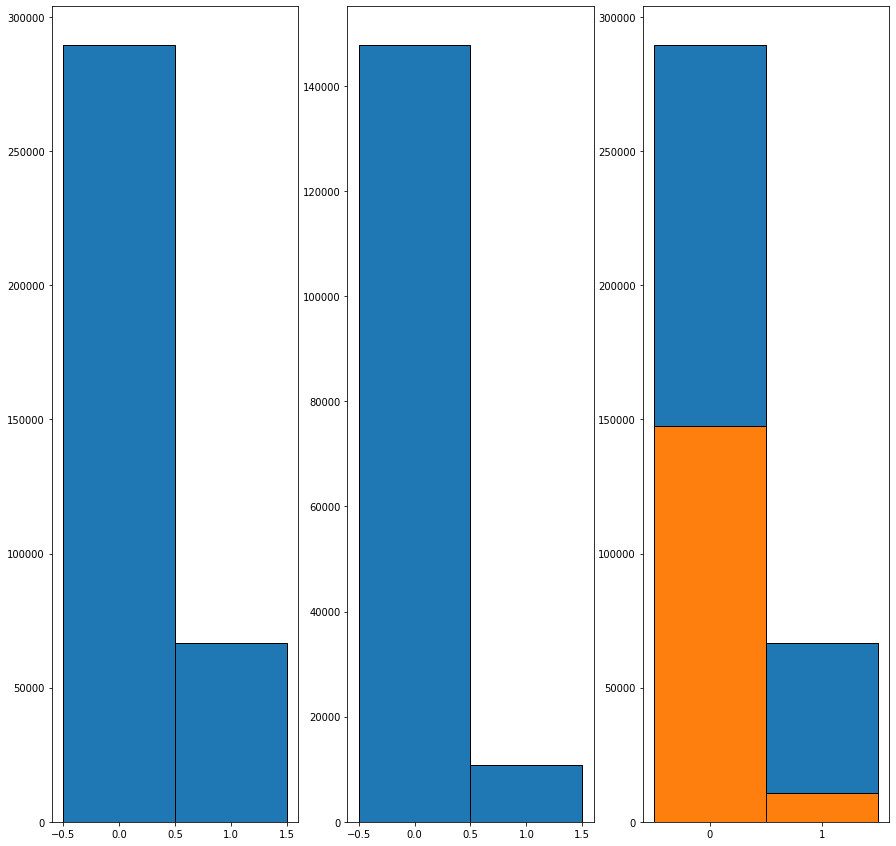

In [4]:
import matplotlib.pyplot as plt

def visualise_imbalance(train_y, valid_y ,labels=[0,1]):

    fig, axes= plt.subplots(nrows=1, ncols=3, figsize = (15,15))
    plt.xticks((0,1))
    axes[0].hist(train_y, label=labels, bins=[-.5,.5,1.5], ec="k")
    axes[1].hist(valid_y, label=labels, bins=[-.5,.5,1.5], ec="k")

    axes[2].hist(train_y, label=labels, bins=[-.5,.5,1.5], ec="k")
    axes[2].hist(valid_y, label=labels, bins=[-.5,.5,1.5], ec="k")


    plt.show()

visualise_imbalance(train_y,valid_y)

###Class Imbalance

<br>
Looking at the histogram for Ground Truth, we can see that our dataset is heavily biased towards 0 class. From this we can conlude
that when choosing algorithms to apply to the dataset, we must be wary of choosing ones that are sensitve to class
imbalance, as they may be heavily biased towards the more prevalent class.
This fact also suggests that using a simple metric for evaluating the quality of a model, such as misclassification loss may produce a poor estimate for generalisation loss, as the algorithm may learn to simply always predict the more common class and still obtain high accuracy. <br>

<br>
Finally, given the imbalance of classes in the dataset, when constructing validation sets (or cross-validation folds) for validation if chosen poorly we have a high likelihood of obtaining subsets of only the non-default data, resulting in poor estimates for the true generalisation loss. Hence, this visualization suggests that it might be worthwhile investing in using
stratified techniques when splitting the data for validation.

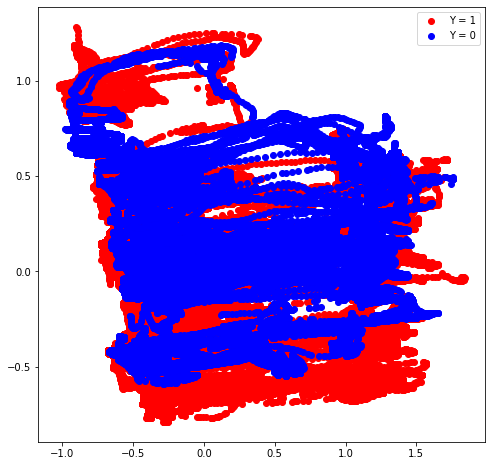

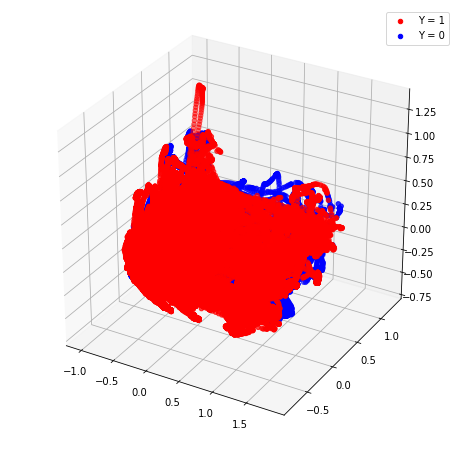

In [5]:
#Dimensionality Reduction imports
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA

import pandas as pd
import matplotlib.pyplot as plt

def transform_and_plot(model, data=train_x, labels=train_y):
    """
    Fits a given model over the scaled dataset and plots the result
    :param model - the untrained model to be fitted over the data
    :param data - the scaled data to be transformed
    :param labels - the corresponding labels for the data
    """
    reduced = model.fit_transform(data)
    dimensions = reduced.shape[1]
    labelled = np.c_[reduced, labels]
    
    assert dimensions == 2 or dimensions == 3, 'transform only supports 2 or 3 dimensions'
    
    projection = None
    if dimensions == 3:
        projection = '3d'

    figure = plt.figure(figsize=(8,8))
    ax = figure.add_subplot(1,1,1, projection=projection)
    neg = reduced[labelled[:,dimensions] == 0]
    pos = reduced[labelled[:,dimensions] == 1]
    ax.scatter(*(neg[:,i] for i in range(dimensions)), c='r')
    ax.scatter(*(pos[:,i] for i in range(dimensions)), c='b')
    ax.legend(['Y = 1', 'Y = 0'])

pca = PCA(n_components=2)
transform_and_plot(pca, train_x, train_y)
transform_and_plot(PCA(n_components=3), train_x, train_y)

### Feature Selection

<br>
Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. <br>

<br>
Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the f_classif() function. We will select the 4 best features using this method in the example below.

In [0]:
# load data
(train_x, train_y), _ = movementDataLoader.more_more_processing(v_stack=False)

# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = train_x
Y = train_y.squeeze()

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3)
print('Fitting scores', fit.scores_, len(fit.scores_))
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

Fitting scores [ 526.428 2487.446   35.201  474.808  198.65   250.842  235.885 1028.863
  234.537 1938.149 4700.717 7024.874   58.877  725.637  514.023 1196.037
 1324.352 1065.226  695.219   39.522  209.71    46.532   20.442  754.793
  357.116   35.197] 26
[[0.941 0.797 0.937 0.982]
 [0.94  0.798 0.937 0.982]
 [0.94  0.797 0.937 0.982]
 [0.94  0.797 0.937 0.982]
 [0.94  0.797 0.937 0.982]]
